# Logistic Regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
import pandas as pd
data=pd.read_csv('framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Analyze the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [8]:
data.shape

(4238, 16)

In [9]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
#drop the education column
data.drop('education',axis=1,inplace=True)

In [11]:
#filled missing values in 'cigsPerDay' column with 0
data['cigsPerDay'].fillna(value=0.0,inplace=True)

In [12]:
#filled missing values in 'BPMeds' column with its mean
data['BPMeds'].fillna(value=(data['BPMeds'].mean()),inplace=True)

In [13]:
#filled missing values in 'totChol' column with its mean
data['totChol'].fillna(value=(data['totChol'].mean()),inplace=True)

In [14]:
#filled missing values in 'BMI' column with its mean
data['BMI'].fillna(value=(data['BMI'].mean()),inplace=True)

In [15]:
#filled missing values in 'glucose' column with its mean
data['glucose'].fillna(value=(data['glucose'].mean()),inplace=True)

In [16]:
#filled missing values in 'heartRate' column with its mean
data['heartRate'].fillna(value=(data['heartRate'].mean()),inplace=True)

In [17]:
#check any missing values
data.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
#drop all other null rows
data=data.dropna()

In [19]:
#check again for null values
data.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Data visualization

<Axes: xlabel='glucose', ylabel='Count'>

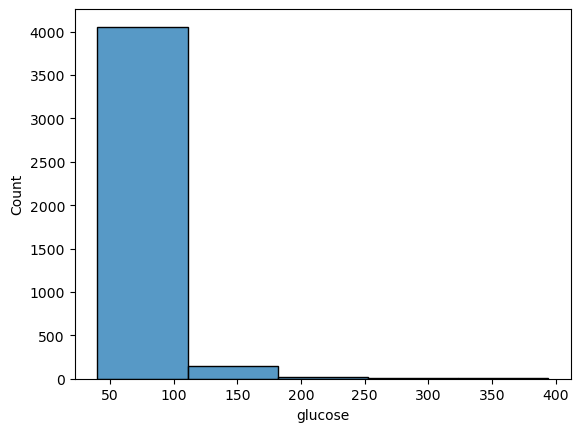

In [20]:
sns.histplot(data=data,x='glucose',bins=5)

<Axes: xlabel='TenYearCHD', ylabel='count'>

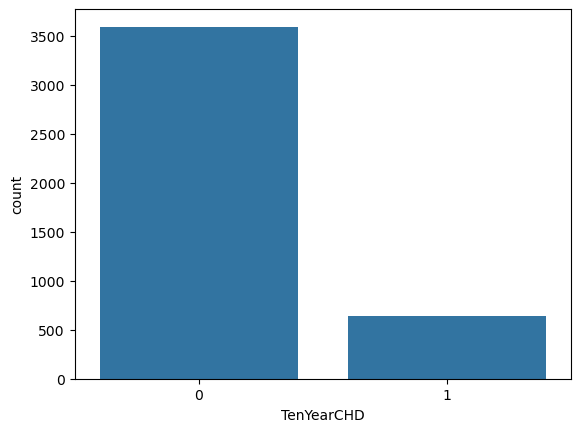

In [21]:
sns.countplot(x='TenYearCHD',data=data)

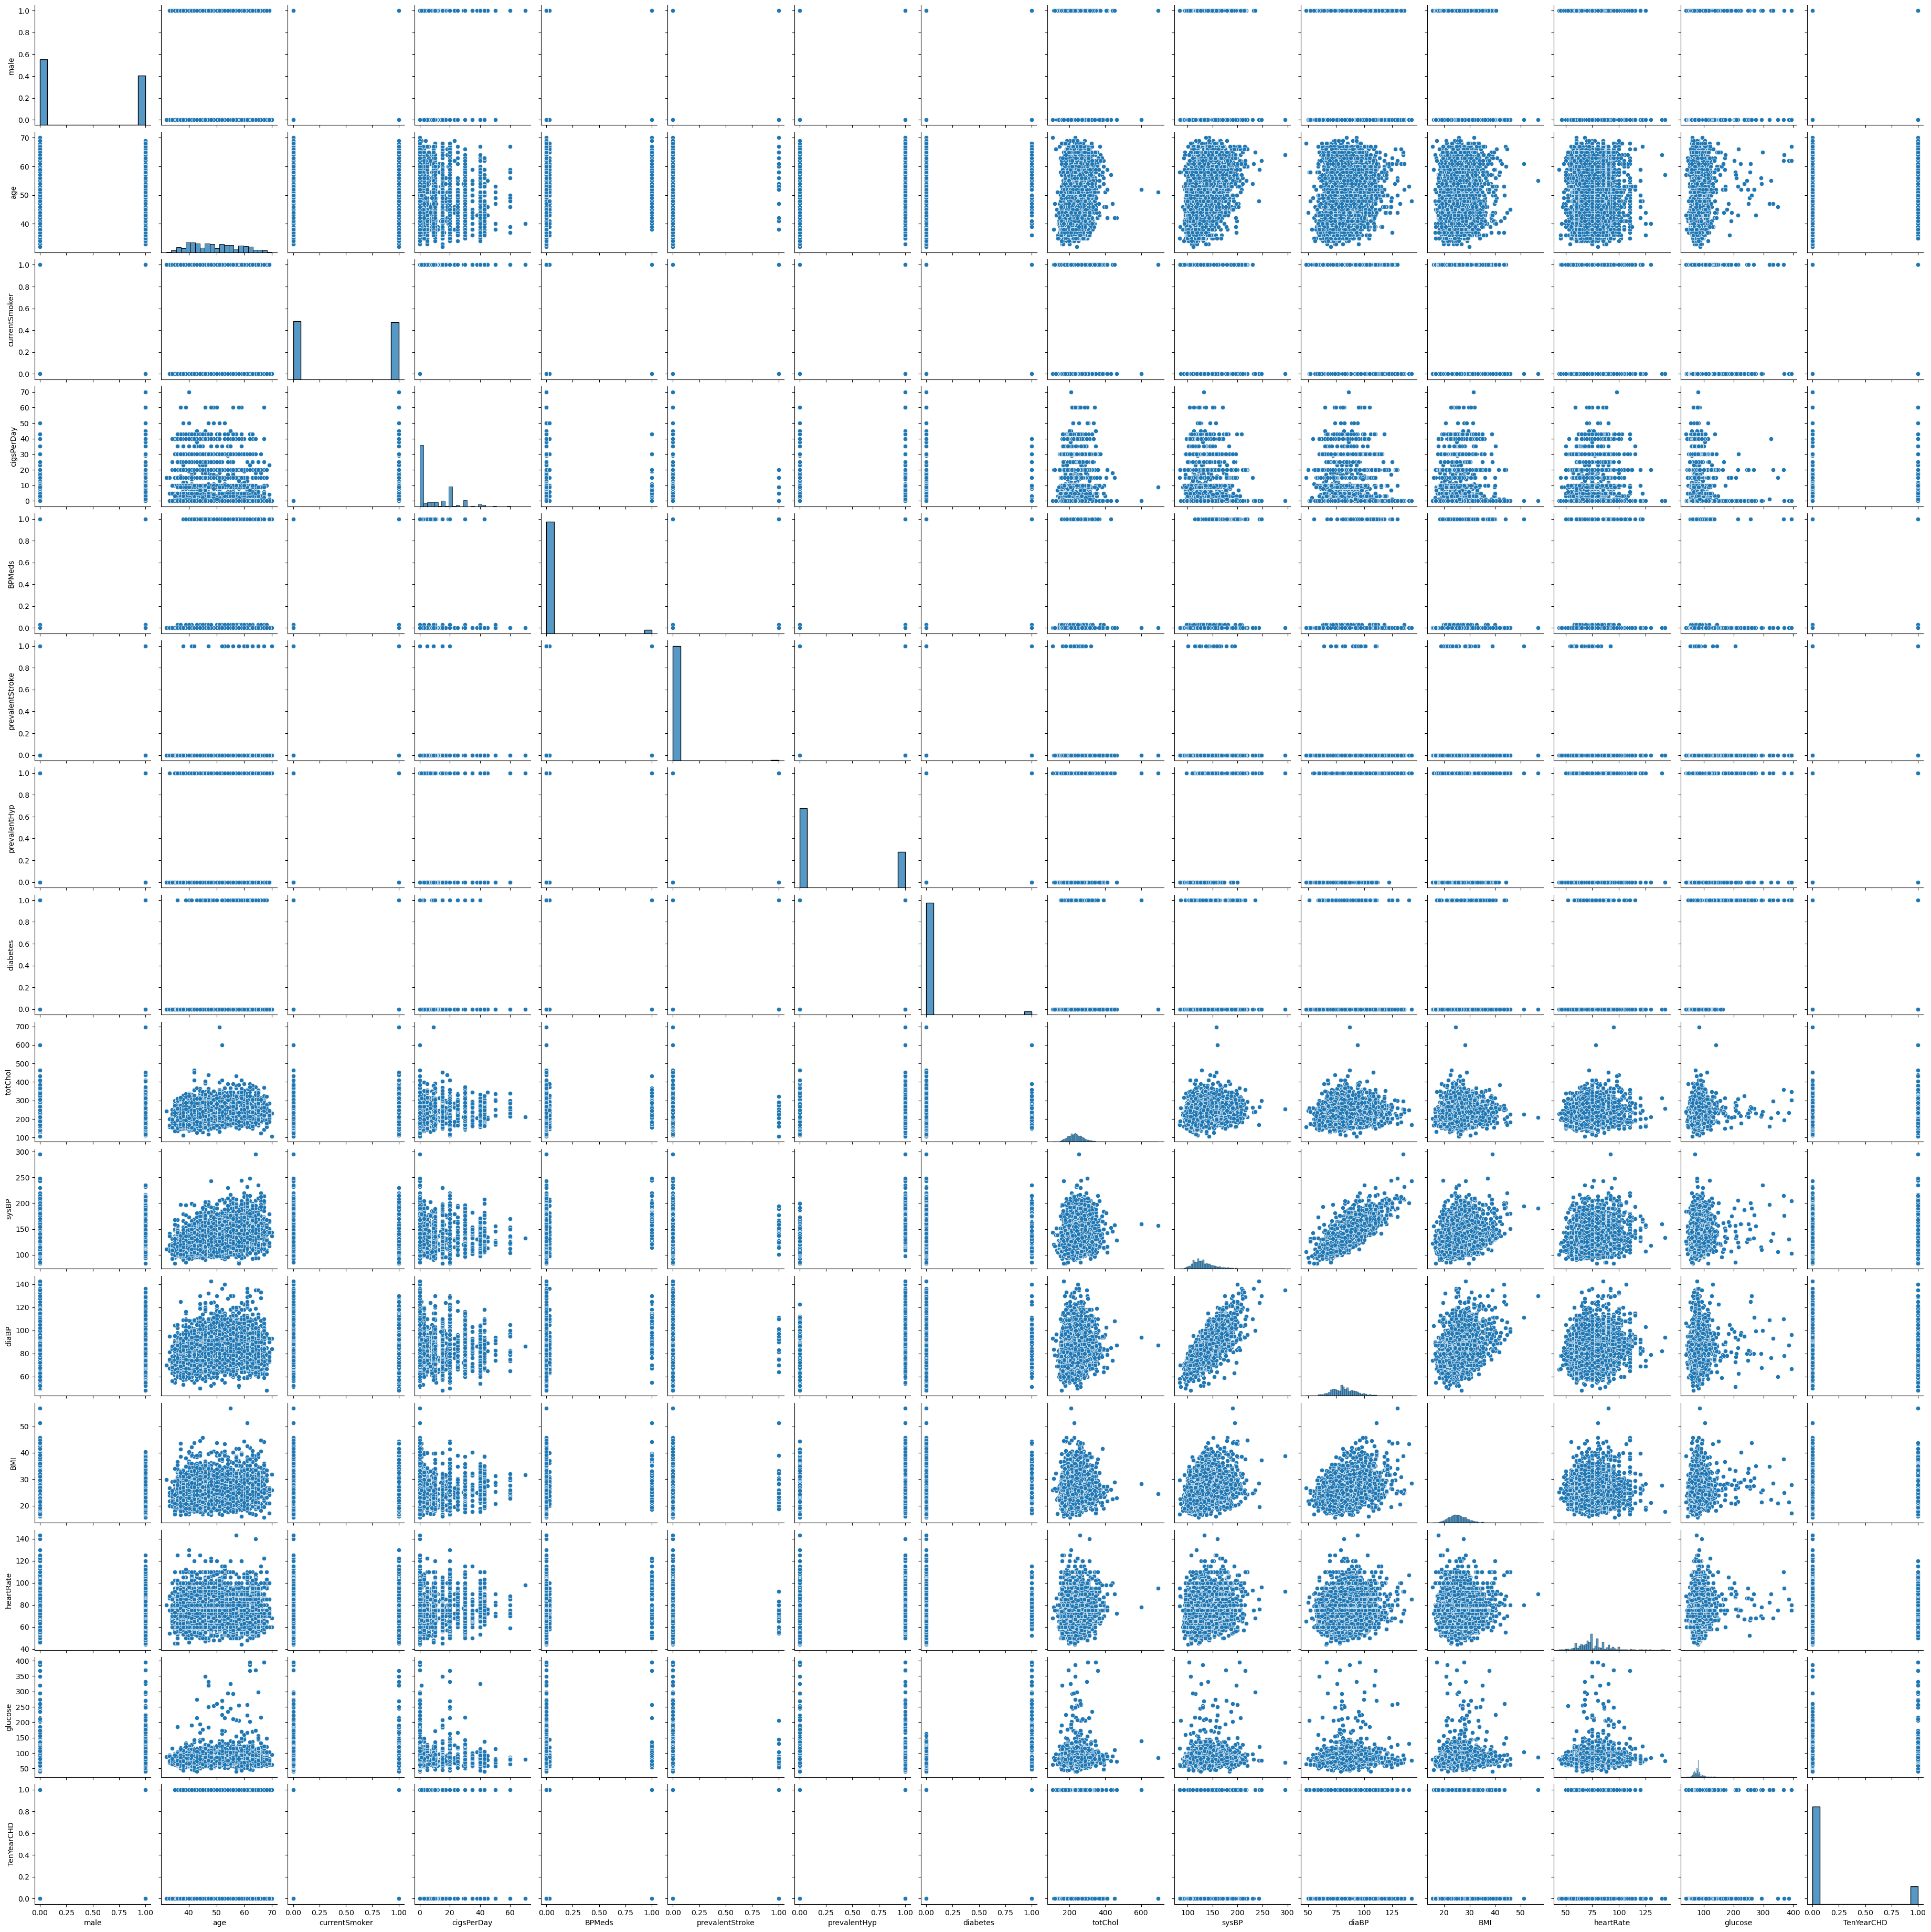

In [21]:
import seaborn as sns
sns.pairplot(data=data)
plt.show()

In [22]:
#separate the feature variable & target variable
x=data.drop('TenYearCHD',axis=1)

In [23]:
y=data['TenYearCHD']
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [24]:
x=data.iloc[:,:-1]
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [25]:
y=data.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

# Split the data into training & testing

In [26]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)

# Standardization:
This process scales each feature such that it has a mean of 0 & a standard deviation of 1

In [27]:
#created an instance of the 'StandardScaler' class called 'SS'
SS=StandardScaler()

In [28]:
#fitted SS on the training dataset
SS.fit(x_train)

StandardScaler()

In [29]:
#transformed both training & test dataset
x_train=SS.transform(x_train)
x_test=SS.transform(x_test)

# Logic Regression

In [30]:
#created an instance of the 'LogicRegression' class called 'LR'
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR

LogisticRegression()

In [31]:
#trainin thre model
LR.fit(x_train,y_train)

LogisticRegression()

In [32]:
#made predictions on test dataset
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
y_test

2354    0
2227    1
2397    0
48      1
740     0
       ..
3427    0
1591    1
1859    0
9       0
3049    0
Name: TenYearCHD, Length: 848, dtype: int64

In [34]:
#calculateed the accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy score:',accuracy_score(y_pred,y_test)*100)

Accuracy score: 83.60849056603774


In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[703, 128],
       [ 11,   6]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       831
           1       0.04      0.35      0.08        17

    accuracy                           0.84       848
   macro avg       0.51      0.60      0.49       848
weighted avg       0.97      0.84      0.89       848



<Axes: >

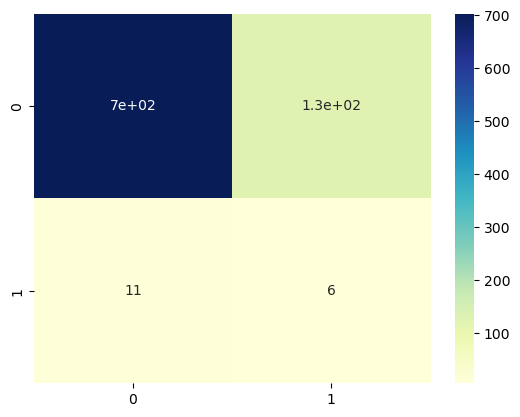

In [37]:
sns.heatmap(cm,annot=True,cmap='YlGnBu')

In [38]:
'''the confussion matrix shows 709+10=719 correct prediction & 122+7=129 incorret prediction
true positives:709
true negatives:10
false positives:122(type 1 error)
false negatives7(type 11 error)'''

'the confussion matrix shows 709+10=719 correct prediction & 122+7=129 incorret prediction\ntrue positives:709\ntrue negatives:10\nfalse positives:122(type 1 error)\nfalse negatives7(type 11 error)'